## Modelo Lineal

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [90]:
variable, y_truth = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
mod_reg = LinearRegression()
mod_reg.fit(variable, y_truth)
y_pred = mod_reg.predict(variable)

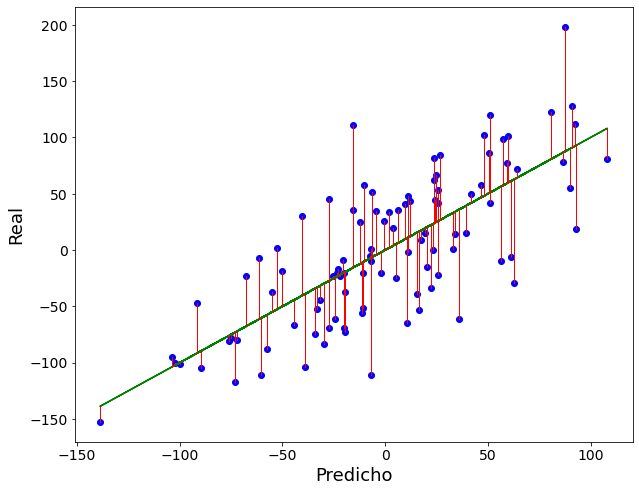

In [91]:
residuals = y_truth - y_pred

plt.figure(figsize=(10,8))
plt.plot(y_pred,y_pred,c='g')
plt.scatter(y_pred, y_truth, c='b', marker='o')

for x, y in zip(y_pred, y_truth):
    plt.plot([x, x], [x, y], 'r', lw=1)

plt.xlabel('Predicho', fontsize=18)
plt.ylabel('Real', fontsize=18)
plt.tick_params(axis='both', labelsize=14)

plt.show()


## Modelo Polinómico

In [92]:
X = np.arange(0, 30)
X = X.reshape(-1, 1)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

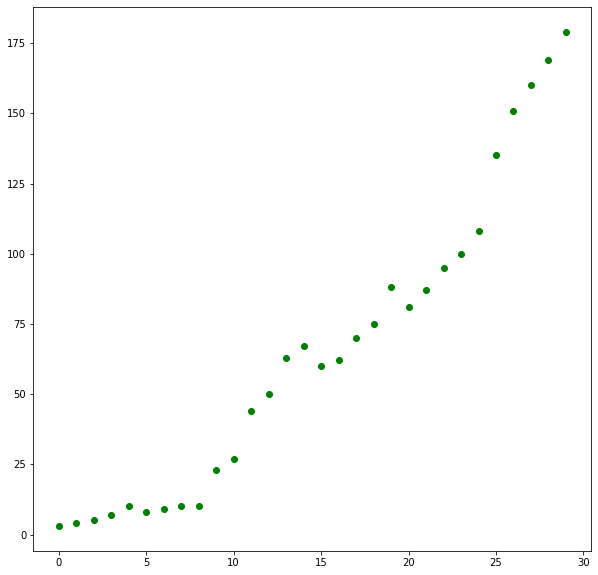

In [94]:
plt.figure(figsize=(10,10))
plt.scatter(X,y,c='g')
plt.show()

In [95]:
mod_lm = LinearRegression()
mod_lm.fit(X,y)
y_pred_lm = mod_lm.predict(X)

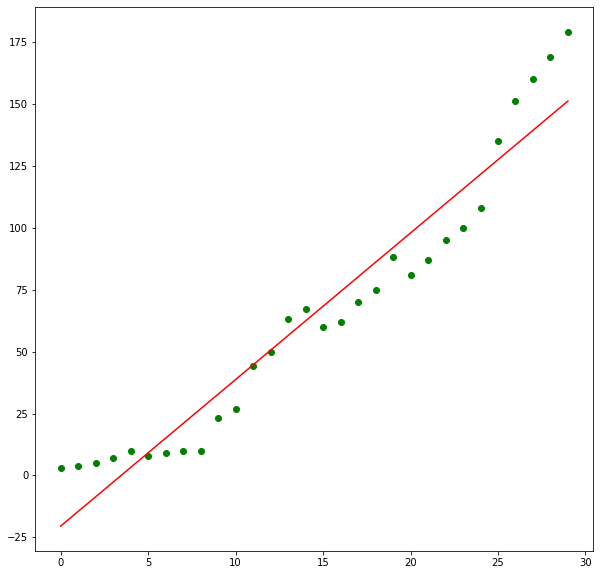

In [96]:
plt.figure(figsize=(10,10))
plt.scatter(X,y,c='g')
plt.plot(X,y_pred_lm,c='red')
plt.show()

In [97]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
var_poly= PolynomialFeatures(degree=2, include_bias=False)
X_poly = var_poly.fit_transform(X.reshape(-1, 1))

In [78]:
mod_lm_pol = LinearRegression()
mod_lm_pol.fit(X_poly,y)
y_pred_pol = mod_lm_pol.predict(X_poly)

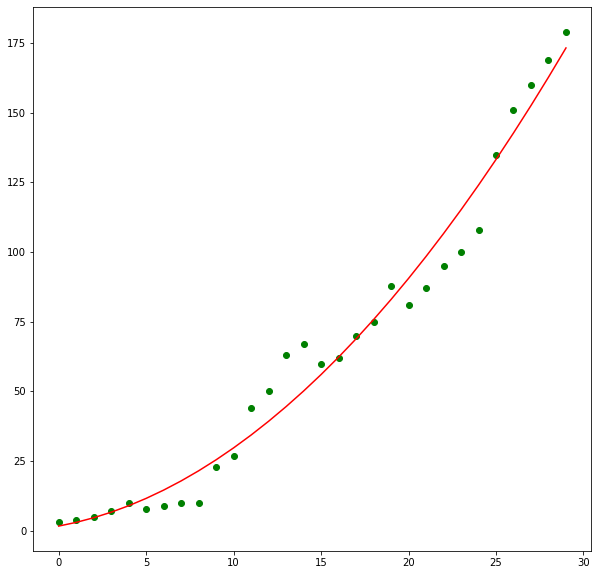

In [100]:
plt.figure(figsize=(10,10))
plt.scatter(X,y,c='g')
plt.plot(X,y_pred_pol,c='red')
plt.show()

In [101]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [104]:
data = load_iris()

In [106]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [108]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [110]:
df['target'] = data.target

In [ ]:
df = df.query("")

In [139]:
df.value_counts('target')

target
0    50
1    50
2    50
dtype: int64

In [138]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [112]:
X = df.drop(columns="target")
y = df["target"]

In [134]:
mod_dt = DecisionTreeClassifier(max_depth = None, random_state = 42)
mod_dt.fit(X, y)
y_pred = mod_dt.predict(X)
accuracy_score(y,y_pred)

DecisionTreeClassifier(random_state=42)

In [115]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

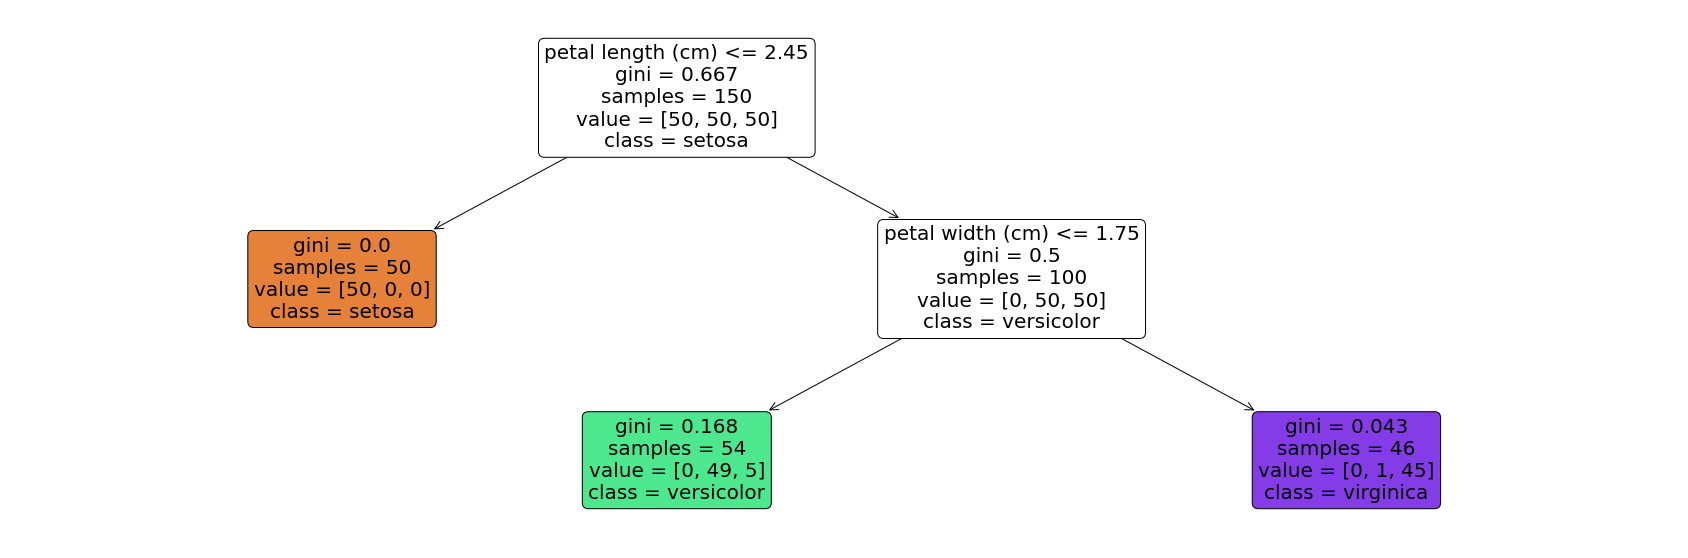

In [129]:
plt.figure(figsize=(30,10))
a = plot_tree(
    mod_dt,
    feature_names = data.feature_names,
    class_names = data.target_names,
    rounded = True,
    filled = True,
    fontsize=20)

plt.show()

In [130]:
from sklearn.metrics import accuracy_score

In [133]:
accuracy_score(y,y_pred)

0.96

In [136]:
accuracy_score(y,y_pred)

1.0

In [137]:
from sklearn.tree import export_text

tree_rules = export_text(mod_dt,feature_names = list(data.feature_names))

print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [142]:
from imblearn.over_sampling import SMOTE

In [162]:
df_ = pd.concat([
    df.query("target !=1"),
    df.query("target ==1").head(10)
])

In [163]:
X = df.drop(columns="target")
y = df["target"]

In [164]:
mod_dt = DecisionTreeClassifier(max_depth = 2, random_state = 42)
mod_dt.fit(X, y)
y_pred = mod_dt.predict(X)
accuracy_score(y,y_pred)

0.96

In [165]:
mod_smote = SMOTE(random_state=1)

In [166]:
mod_smote.fit(X,y)

SMOTE(random_state=1)

In [167]:
X_over,y_over = mod_smote.fit_resample(X,y)

In [168]:
mod_dt = DecisionTreeClassifier(max_depth = 2, random_state = 42)
mod_dt.fit(X_over, y_over)
y_pred = mod_dt.predict(X)
accuracy_score(y,y_pred)

0.96